In [1]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [2]:
!pip install -U "langchain[openai]"

  Using cached distro-1.9.0-py3-none-any.whl.metadata (6.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.7/996.7 kB 25.7 MB/s eta 0:00:00
Using cached distro-1.9.0-py3-none-any.whl (20 kB)

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [4]:
!pip install dotenv

  Using cached python_dotenv-1.1.1-py3-none-any.whl.metadata (24 kB)
Using cached python_dotenv-1.1.1-py3-none-any.whl (20 kB)

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [10]:
from dotenv import load_dotenv

load_dotenv()

True

In [ ]:
import os
from langchain.chat_models import init_chat_model

# os.environ["OPENAI_API_KEY"] = "sk-..."

from dotenv import load_dotenv

load_dotenv()


llm = init_chat_model("openai:gpt-4.1")

In [3]:
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [4]:
graph_builder.add_edge(START, "chatbot")

In [5]:
graph_builder.add_edge("chatbot", END)

In [6]:
graph = graph_builder.compile()

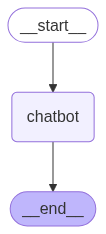

In [7]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
# def stream_graph_updates(user_input: str):
#     for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
#         for value in event.values():
#             print("Assistant:", value["messages"][-1].content)


# while True:
#     try:
#         user_input = input("User: ")
#         if user_input.lower() in ["quit", "exit", "q"]:
#             print("Goodbye!")
#             break
#         stream_graph_updates(user_input)
#     except:
#         # fallback if input() is not available
#         user_input = "What do you know about LangGraph?"
#         print("User: " + user_input)
#         stream_graph_updates(user_input)
#         break

In [2]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 2.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [12]:
import ipywidgets as widgets
from IPython.display import display, clear_output

out = widgets.Output()
display(out)

text_box = widgets.Text(
    placeholder='Type your question...',
    description='User:',
    layout=widgets.Layout(width="80%")
)
display(text_box)

def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            with out:
                print("Assistant:", value["messages"][-1].content)

def handle_submit(sender):
    user_input = text_box.value.strip()
    text_box.value = ""  # clear box after submission
    
    if user_input.lower() in ["quit", "exit", "q"]:
        with out:
            print("Goodbye! Chat ended.")
        text_box.disabled = True
        return
    
    with out:
        print("User:", user_input)
    stream_graph_updates(user_input)

text_box.on_submit(handle_submit)


Output()

Text(value='', description='User:', layout=Layout(width='80%'), placeholder='Type your question...')

/var/folders/z6/m56_lfz55xlcdsxdv60z5q340000gn/T/ipykernel_24556/2722829576.py:34: DeprecationWarning: on_submit is deprecated. Instead, set the .continuous_update attribute to False and observe the value changing with: mywidget.observe(callback, 'value').
  text_box.on_submit(handle_submit)


  Using cached aiohttp-3.12.15-cp312-cp312-macosx_11_0_arm64.whl.metadata (7.7 kB)
  Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl.metadata (5.9 kB)
  Using cached aiosignal-1.4.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached frozenlist-1.7.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (18 kB)
  Using cached multidict-6.6.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.3 kB)
  Using cached propcache-0.3.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (12 kB)
  Using cached yarl-1.20.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (73 kB)
Using cached aiohttp-3.12.15-cp312-cp312-macosx_11_0_arm64.whl (469 kB)
Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl (15 kB)
Using cached aiosignal-1.4.0-py3-none-any.whl (7.5 kB)
Using cached attrs-25.3.0-py3-none-any.whl (63 kB)
Using cached frozenlist-1.7.0-cp312-cp312-macosx_11_0_arm64.whl (46 kB)
Using cached multidict-6.6.4-cp312-cp312-macosx_11_0_arm64.whl (43 kB)
Using ca

{'query': 'What jobs were posted on google in last 24hours for MLE role?',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://www.kaggle.com/datasets/ivankmk/thousand-ml-jobs-in-usa',
   'title': 'Machine Learning Job Postings in the US - Kaggle',
   'content': 'This dataset contains 1,000 job postings for Machine Learning-related roles across the United States, scraped between late 2024 and early 2025. The data was',
   'score': 0.6194488,
   'raw_content': None},
  {'url': 'https://www.glassdoor.com/Jobs/Google-machine-learning-Jobs-EI_IE9079.0,6_KO7,23.htm',
   'title': 'Google Machine Learning Jobs | Glassdoor',
   'content': '676 Google Machine Learning jobs. Search job openings, see if they fit - company salaries, reviews, and more posted by Google employees.',
   'score': 0.509887,
   'raw_content': None}],
 'response_time': 0.81,
 'request_id': 'b672394c-041c-4f08-8ec9-4966ee17ced6'}